## Imports

In the code cell below import the following 
- pandas as __pd__, 
- numpy as __np__, and
- matplotlib.pyplot as __plt__.
- seaborn as __sns__.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Activity 1

Write code to perform following:
1. Mount your drive.
2. Read in the dataset saved in **Cohort_X/Data/Brazilian-fire-dataset.csv** and save it to a variable called `df_ffire`.
3. Display the top 10 rows of the data frame.
4. Generate summary statistics for all columns.

In [80]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [81]:
df_fire = pd.read_csv('/drive/My Drive/Cohort_7/Data/Brazilian-fire-dataset.csv')

In [82]:
df.head(10)

,Year,State,Month,Number of Fires,Date Reported
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
5,2003,Acre,January,10.0,2003-01-01
6,2004,Acre,January,0.0,2004-01-01
7,2005,Acre,January,12.0,2005-01-01
8,2006,Acre,January,4.0,2006-01-01
9,2007,Acre,January,0.0,2007-01-01


In [83]:
df_fire.describe(include='all')

,Year,State,Month,Number of Fires,Date Reported
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,27,12,NaN,20
top,NaN,Alagoas,January,NaN,1/01/2004
freq,NaN,240,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


Based on the information collected so far, can you answer the following:

1.  What is the maximum number of fires reported on any given day?
2. In the dataset what is the total number of states for which the fire incidents have been reported?

1. `998`
2. `27`


## Activity 2


1. Change the `Date Reported` column to a datetime object. 
2. Filter the `df_ffire` data frame to only keep the rows that are in the Acre, Bahia or Mato Grosso states. Save this filtered data frame as `df_ffire_filt`. 
3. Create a seaborn line plot of `df_ffire_filt` with the `Date Reported` on the x-axis, the `Number of Fires` on the y-axis and the `State` as the hue. 

In [84]:
df_fire['Date Reported'] = df_fire['Date Reported'].astype('datetime64[ns]')

In [85]:
df_ffire_filt = df_fire[df_fire.State.isin(['Acre', 'Bahia', 'Mato Grosso'])]

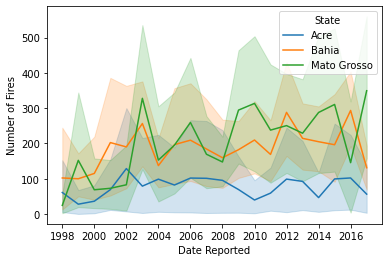

In [86]:
sns.lineplot(data=df_ffire_filt, x='Date Reported', y='Number of Fires', hue='State')

## Activity 3
1. Find which state has recorded the maximum number of fires on any given day (not the total sum), and in which month did it occur?

HINT: 
- Create a boolean filter based on condition on column __Number of Fires__, and 
- Using this filter perform an indexing operation on the DataFrame to retrieve the corresponding records

In [87]:
df_fire[df_fire['Number of Fires'] == df_fire['Number of Fires'].max()]

,Year,State,Month,Number of Fires,Date Reported
888,2008,Amazonas,September,998.0,2008-01-01


## Activity 4

1. Calculate the total number of fires for the entire duration (i.e. for 1998 to 2018) for every state. Save the result to a data frame called `df_group_states`.
2. Print the Summary Statistics for `df_group_states` - and what is the minimum and maximum number of total fires records?
4. Which state has recorded the minimum number of total fires, and which state has recorded the maximum number of total fires?

__HINT:__
- Use the `groupby` operation on the State column. 
- Pandas has methods `idxmax()` and `idxmin()` which return the indices corresponding to the maximum and minimum values respectively, in a Pandas Series (or a Column in DataFrame).

In [88]:
df_group_states = df_fire.groupby(['State']).agg({'Number of Fires': 'sum'})

In [89]:
df_group_states.describe()

,Number of Fires
count,27.000000
mean,25886.076778
std,14260.072004
min,3237.000000
25%,15625.515000
50%,24498.000000
75%,37585.389000
max,51121.198000


In [90]:
print(f'Min:{df_group_states.idxmin()}\nMax:{df_group_states.idxmax()}')

Min:Number of Fires    Sergipe
dtype: object
Max:Number of Fires    São Paulo
dtype: object


## Activity 5

1. Reset the index of the `df_group_states` DataFrame so that States are not considered as index, and are rather considered as Data Column (Hint: use method __reset_index()__ for this operation
2. Arrange the DataFrame in descending order of "Total Number of Fires".
3. Create a seaborn barplot with the State on the x-axis and the Number of Fires on the y-axis. Rotate the State labels on the x-axis so they are easier to read. 
    


In [91]:
df_group_states.reset_index(inplace=True)

In [92]:
df_group_states

,State,Number of Fires
0,Acre,18464.030
1,Alagoas,4644.000
2,Amapá,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceará,30428.063
6,Distrito Federal,3561.000
7,Espírito Santo,6546.000
8,Goiás,37695.520
9,Maranhão,25129.131


In [93]:
df_group_states.sort_values(by=['Number of Fires'], ascending=False, inplace=True)

In [94]:
df_group_states

,State,Number of Fires
25,São Paulo,51121.198
10,Mato Grosso,48477.827
11,Mato Grosso do Sul,47768.201
4,Bahia,44746.226
13,Paraná,39648.918
17,Piauí,37803.747
8,Goiás,37695.520
12,Minas Gerais,37475.258
26,Tocantins,33707.885
3,Amazonas,30650.129


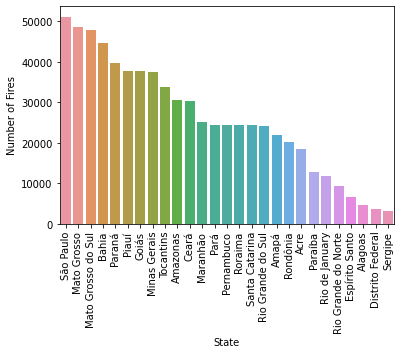

In [95]:
sns.barplot(data=df_group_states, x='State', y='Number of Fires')
plt.xticks(rotation=90);